# Proyecto ML No Supervisado:

## Clasificación de datos (en 2D) mediante K-means

### * Al final veremos como guardar el modelo entrenado para posteriormente poder usarlo y hacer predicciones sin volver a entrenarlo

In [1]:
# importamos paquetes de graficación:
import matplotlib.pyplot as plt

# importamos paquete matemático:
import numpy as np

# Importamos algoritmo K-means de SciKit Learn:
from sklearn.cluster import KMeans

# Importamos función para mdeir el accuracy:
from sklearn import metrics

# Importamos el dataset "make_blobs" que genera un conjunto de "manchas" 
from sklearn.datasets import make_blobs

In [2]:
# Generamos los datos con el generador de datos 'make blobs':

K_features=10#<--- numero de centroides 'k' del K-means para generar los datos

n=1000 # <--- numero de datos

features, labels = make_blobs(n_samples=n, centers=K_features, random_state=42)

In [3]:
# Verificamos el tipo de datos de cada componente:
print('Los "features" son de tipo: ',type(features))

print('Las "labels" son de tipo: ',type(labels))

# Dimensiones de cada componete:
print('\nLos "features" son un array de tamaño: ', features.shape)

print('Las "labels" son un array de tamaño: ', labels.shape)

Los "features" son de tipo:  <class 'numpy.ndarray'>
Las "labels" son de tipo:  <class 'numpy.ndarray'>

Los "features" son un array de tamaño:  (1000, 2)
Las "labels" son un array de tamaño:  (1000,)


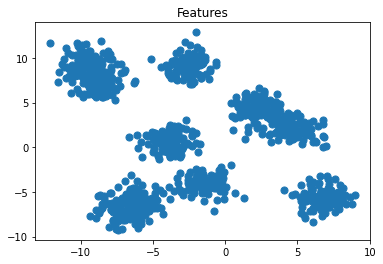

In [4]:
# Graficamos un diagrama de dispersión de los datos:
plt.figure()
plt.scatter(features[:,0], features[:,1], s=50) #<--- 's' indica el grosor de los puntos
plt.title('Features')
plt.show()

In [5]:
# llamamos al algoritmo 'K-means':
K=10 # <--- numero de clusters deseados
clf_kmeans = KMeans(n_clusters=K)

In [6]:
# entrenar el algoritmo con los features de entrenamiento:
clf_kmeans.fit(features)

KMeans(n_clusters=10)

In [7]:
# Después del entrenamiento, obtenemos los puntos de los centroides de los 'K' clusters:
centers = clf_kmeans.cluster_centers_
print(centers)

[[-2.60246927  9.12900725]
 [-5.91246413 -5.77106689]
 [ 4.72045476  1.95362457]
 [-8.86086407  7.29147809]
 [-3.87930094  0.62649577]
 [ 6.66698063 -5.68755849]
 [ 2.13593554  4.37379854]
 [-1.38096897 -4.1355047 ]
 [-7.13806959 -7.34095392]
 [-9.55781338  9.72648918]]


In [8]:
# Obtenemos las etiquetas de los datos clasificados con K-means:
labels_predict = clf_kmeans.predict(features)
#print(labels_predict)

In [9]:
# Calculamos la precisión de la clasificación:
accuracy = metrics.adjusted_rand_score(labels , labels_predict)
accuracy
# Obs: Podemos ver que si K < 10 o K > 10 el accuracy se reduce

0.813962278154842

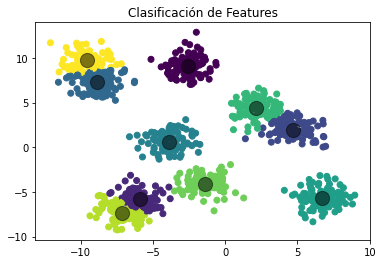

In [10]:
# graficamos datos y un color 'c' correspondiente a su etiqueta
plt.scatter(features[:,0], features[:,1], c=labels_predict)

# graficamos centros de cada cluster:
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

plt.title('Clasificación de Features')
plt.show()

# Guardamos el modelo entrenado para usarlo posteriormente sin tener que volver a entrenar:

In [11]:
# Importamos función para guardar el modelo entrenado:
#from sklearn.externals import joblib
import joblib

joblib.dump(clf_kmeans , 'modelo_entrenado_K_means_0.pkl')

['modelo_entrenado_K_means_0.pkl']